In [35]:
import uproot
import pandas as pd
from pylorentz import Momentum4
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df_tt_gen = pd.read_pickle('df_tt_gen.pkl')

In [6]:
df_tt_gen.head()

,wt_cp_sm,wt_cp_ps,wt_cp_mm,rand,dm_1,dm_2,pi_E_1,pi_px_1,pi_py_1,pi_pz_1,...,pi0_py_2,pi0_pz_2,metx,mety,sv_x_1,sv_y_1,sv_z_1,sv_x_2,sv_y_2,sv_z_2
entry,,,,,,,,,,,,,,,,,,,,,
0,1.601494,0.310697,0.581832,0.529761,1.0,1.0,10.994950,8.404180,6.915075,1.555936,...,-3.580417,0.147664,21.212856,16.206368,0.023583,0.019393,0.005763,-0.581665,-0.513909,0.018126
1,1.616939,0.048255,0.718878,0.625262,10.0,0.0,80.198681,-3.553889,36.892234,-71.120615,...,0.000000,0.000000,4.612193,-13.801276,-0.097911,0.989190,-1.882611,0.000394,-0.001668,-0.005869
2,0.145634,1.555381,0.524301,0.600541,1.0,10.0,63.063316,33.907569,22.022118,48.396957,...,0.000000,0.000000,21.313398,48.146972,0.047770,0.031705,0.067133,-0.085217,0.345833,0.142905
3,1.487983,0.444336,1.316065,0.764755,1.0,1.0,29.041587,24.443190,-4.880136,-14.903323,...,-16.557451,-94.600909,6.099251,-8.346872,0.264949,-0.061602,-0.161944,-0.120283,-0.045656,-0.260196
4,0.370084,1.765682,1.648769,0.604970,10.0,10.0,5.500041,-4.350674,-2.053902,2.661596,...,0.000000,0.000000,-0.671295,1.881746,-0.304889,-0.132517,0.176034,0.196662,0.151155,0.536159


In [9]:
# reconstruct the rhos
def get_products(df_reco):
    pi_1 = Momentum4(df_reco['pi_E_1'], df_reco["pi_px_1"], df_reco["pi_py_1"], df_reco["pi_pz_1"])
    pi_2 = Momentum4(df_reco['pi_E_2'], df_reco["pi_px_2"], df_reco["pi_py_2"], df_reco["pi_pz_2"])
    pi0_1 = Momentum4(df_reco['pi0_E_1'], df_reco["pi0_px_1"], df_reco["pi0_py_1"], df_reco["pi0_pz_1"])
    pi0_2 = Momentum4(df_reco['pi0_E_2'], df_reco["pi0_px_2"], df_reco["pi0_py_2"], df_reco["pi0_pz_2"])
    rho_1 = pi_1 + pi0_1
    rho_2 = pi_2 + pi0_2
    return pi_1, pi_2, pi0_1, pi0_2, rho_1, rho_2
pi_1, pi_2, pi0_1, pi0_2, rho_1, rho_2 = get_products(df_tt_gen)

In [10]:
rho_1.p

array([ 33.75304135,  80.19855999,  72.56106464, ...,  23.06989699,
        80.17633554, 153.08791219])

In [30]:
m = 775.49 # GeV
l = 87 #um

def get_velocity(p):
    Q = p/m
    return np.sqrt(Q**2/(1+Q**2))

def get_gamma(beta):
    return np.sqrt(1/(1-beta**2))

In [31]:
beta_1 = get_velocity(rho_1.p)
gamma_1 = get_gamma(beta_1)
l_1 = l*gamma_1

In [32]:
l_1

array([87.08236774, 87.46399514, 87.38001146, ..., 87.0384886 ,
       87.46373869, 88.67898987])

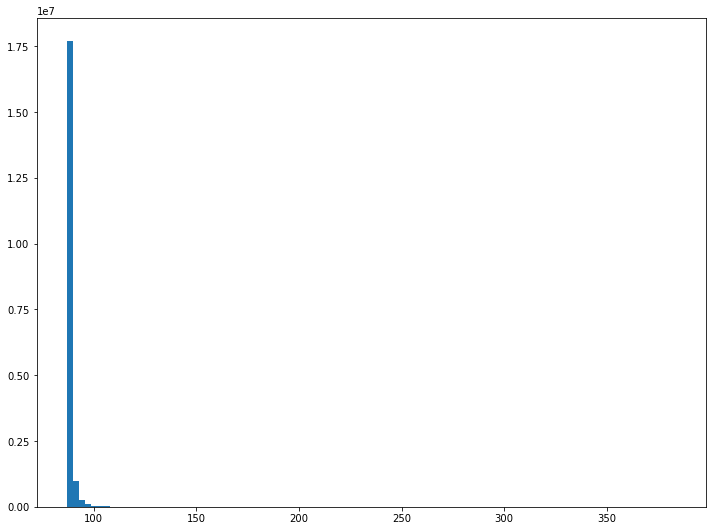

In [41]:
plt.figure(figsize=(12,9))
plt.hist(l_1, bins=100)
plt.show()